# Extreme Value Analysis

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Solution</b>
    
This is the full solution, which you should use for studying. There was also a partial solution that was shared during the workshop which did not include the answers to the interpretation questions.
</p>
</div>

In this workshop, we will complete our Extreme Value Analysis (EVA) to characterize wave loading. Remeber that we were using wave data in the North sea extracted from [ERA5 database](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview) . 

Now, let's go back to our analysis. In the following steps, make use of the code you and your peers prepared home. Remember that we also calculated the value of the return period that it was required for our design, RT = 475 years.

Now, we'll start by importing the packages. Here it is our suggestion, but feel free to add any packages you may need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.signal import find_peaks
import datetime
%matplotlib inline
from dispersion_index import DI_plot

## EVA using POT + GPD

First, we import the data. Note that you will have to change the name of the file depending on the selected dataset.

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
This workshop uses the same file as in HW2: `Time_Series_DEN_lon_8_lat_56.5_ERA5.txt`
</p>
</div>

In [2]:
pandas = pd.read_csv('Time_Series_DEN_lon_8_lat_56.5_ERA5.txt', delimiter=r"\s+", 
                     names=['date_&_time', 
                            'significant_wave_height_(m)', 
                            'mean_wave_period_(s)', 
                            'Peak_wave_Period_(s)', 
                            'mean_wave_direction_(deg_N)', 
                            '10_meter_wind_speed_(m/s)', 
                            'Wind_direction_(deg_N)'],  # custom header names
                     skiprows=1)  # Skip the initial row (header)


We will change the format of the time stamp and start taking looking how our data looks. Ensure you know what it is in each column of the dataframe.

In [3]:
pandas['date_&_time'] = pd.to_datetime(pandas['date_&_time']-719529, unit='D')

# The value 719529 is the datenum value of the Unix epoch start (1970-01-01), 
# which is the default origin for pd.to_datetime().

pandas.head()

date_&_time  significant_wave_height_(m)  \
0 1950-01-01 00:00:00.000000000                     1.274487   
1 1950-01-01 04:00:00.000026880                     1.338850   
2 1950-01-01 07:59:59.999973120                     1.407454   
3 1950-01-01 12:00:00.000000000                     1.387721   
4 1950-01-01 16:00:00.000026880                     1.660848   

   mean_wave_period_(s)  Peak_wave_Period_(s)  mean_wave_direction_(deg_N)  \
0              4.493986              5.177955                   199.731575   
1              4.609748              5.255064                   214.679306   
2              4.775651              5.390620                   225.182820   
3              4.800286              5.451532                   227.100041   
4              5.112471              5.772289                   244.821975   

   10_meter_wind_speed_(m/s)  Wind_direction_(deg_N)  
0                   8.582743              211.166241  
1                   8.867638              226.280409  
2                   9.423382              230.283209  
3                   9.037646              238.879880  
4                  10.187995              242.554054

We already plotted and performed basic analysis to our data in the previous assignment. Also, we selected the dominant wave direction and filtered the data accordingly. Check the solution notebook for the previous workshop in case of doubt.

5.003667620267622


(0.0, 350.0)

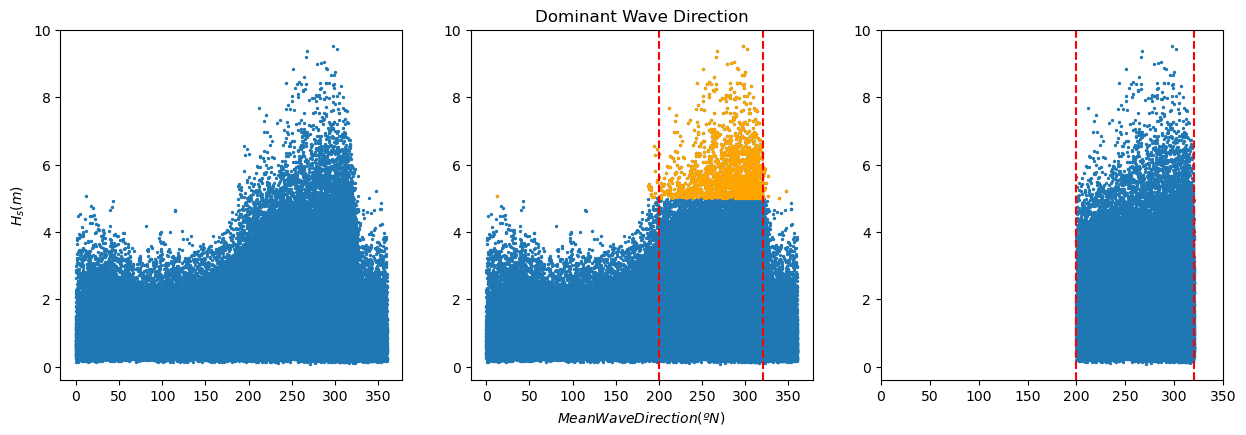

In [4]:
plt.figure(2, figsize = (15,10), facecolor='white')

plt.subplot(2,3,1)
plt.scatter(pandas['mean_wave_direction_(deg_N)'], pandas['significant_wave_height_(m)'], s = 2)
plt.ylabel('${H_s (m)}$')

print(pandas['significant_wave_height_(m)'].quantile(0.99))
pandas_99 = pandas[pandas['significant_wave_height_(m)']>=pandas['significant_wave_height_(m)'].quantile(0.99)]

plt.subplot(2,3,2)
plt.title('Dominant Wave Direction')
plt.scatter(pandas['mean_wave_direction_(deg_N)'], pandas['significant_wave_height_(m)'], s = 2)
plt.scatter(pandas_99['mean_wave_direction_(deg_N)'], pandas_99['significant_wave_height_(m)'], color='orange', s = 2)
plt.axvline(x = 200, color = 'r', linestyle = 'dashed')
plt.axvline(x = 320, color = 'r', linestyle = 'dashed')
plt.xlabel('$Mean Wave Direction (ºN)$')


pandas_angle = pandas[(pandas['mean_wave_direction_(deg_N)'].between(200, 320))]

plt.subplot(2,3,3)
plt.scatter(pandas_angle['mean_wave_direction_(deg_N)'], pandas_angle['significant_wave_height_(m)'], s = 2)
plt.axvline(x = 200, color = 'r', linestyle = 'dashed')
plt.axvline(x = 320, color = 'r', linestyle = 'dashed')
plt.xlim([0, 350])

Note that we stored the filtered data in the dataframe '*pandas_angle*', so that's the one you should use in the subsequent analysis.

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 1:</b>
Apply POT to sample the extreme observations (you should have already done the function as homework!). Plot the results.
    
Use a threshold of 5 meters and a declustering time of 72h.
</p>
</div>

<div style="background-color:#F9E076; vertical-align: middle; padding:3px 20px;">
<p>
Here the solutions are provided using PyExtremes package. You are not required to know who to use it, but you should be able to interpret the results of these analysis.
</p>
</div>

In [5]:
#Import packages and prepare your data
from pyextremes import plot_parameter_stability
from pyextremes.plotting import plot_extremes
from pyextremes import EVA
from pyextremes import get_extremes
from pyextremes import plot_threshold_stability
data = pd.DataFrame(
    {'Date-Time (GMT)':pandas_angle['date_&_time'],
     'Significant_wave_height (m)':pandas_angle['significant_wave_height_(m)']
    }).set_index('Date-Time (GMT)')
data = data.squeeze()

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Date-Time (GMT)', ylabel='Significant_wave_height (m)'>)

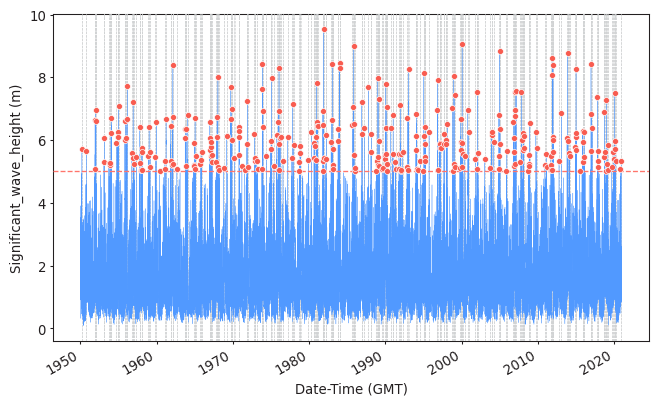

In [6]:
#Extracting the extremes using POT
model = EVA(data=data)
model.get_extremes(
    method="POT",
    extremes_type="high",
    threshold = 5, 
    r = "72H")
#Plotting them
plot_extremes(
    ts=data,
    extremes = model.extremes,
    extremes_method="POT",
    extremes_type="high",
    threshold=5,
    r="72H",
)

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 2:</b>
Fit the sampled extremes to fit a Generalized Pareto distribution. Print the shape parameter. What type of GPD are you obtaining?<br>    
<em>Hint: what kind of tail is implied by the parameter value?</em>
</p>
</div>

In [7]:
#Fitting the distribution and printing the fitting features
model.fit_model(
    model = "MLE",
    distribution = "genpareto")
print(model.model)

              MLE model               
--------------------------------------
free parameters: c=-0.159, scale=1.206
fixed parameters: floc=5.000          
AIC: 709.530                          
loglikelihood: -352.747               
return value cache size: 0            
fit parameter cache size: 0           
--------------------------------------


<div style="background-color:#ffffe0; vertical-align: middle; padding:3px 20px;">
<p>
The obtained parameter is close to 0, so the obtained GPD will be close to an Exponential.
</div>

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 3:</b>
Assess the goodness of fit of the distribution using a QQplot. Comment about the results of the fitting and compare it to those obtained using BM and GEV. Which one would you choose?
</p>
</div>

(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='Significant_wave_height (m)'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='Significant_wave_height (m)', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

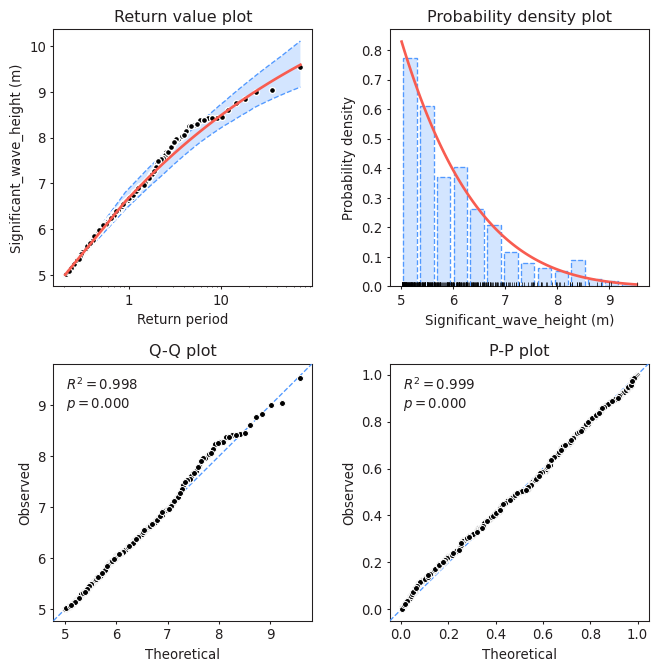

In [9]:
#Assessing goodness of fit
model.plot_diagnostic(alpha=0.95)

<div style="background-color:#ffffe0; vertical-align: middle; padding:3px 20px;">
<p>
QQplot compares the measured and predicted quantiles given by our fit. Therefore, the perfect fit would be the 45-degrees line. In the plot, we can see that the fit is actually very close to that line even for high values of the variable, suggesting that our model is properly modelling the tails.

If we compare it with the fit provided by BM + GEV, we can see that this one is slightly better, since the points fluctuate a bit less around the 45-degrees line.
</div>

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 4:</b>
Plot the return level plot and determine the value of the significant wave height that you need for design according to your calculated return period. Remember that return level plot presents in the x-axis the values of the variable (wave height, here) and in the y-axis the corresponding values of the return period. 

Compare it to the results obtained using BM + GEV.
</p>
</div>

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Return period', ylabel='Significant_wave_height (m)'>)

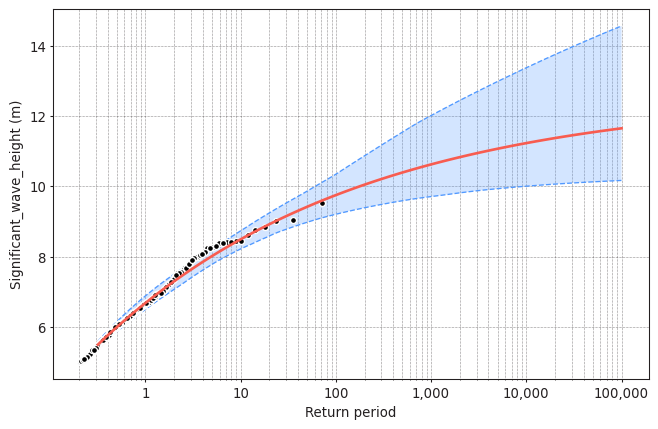

In [11]:
model.plot_return_values(
    return_period=np.logspace(-0.5, 5, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

In [12]:
design_value = model.get_return_value(
    return_period=475,
    return_period_size="365.2425D",
    alpha = 0.9
)
print(design_value)

(10.374699390221444, 9.687030951678576, 11.148899924949287)


<div style="background-color:#ffffe0; vertical-align: middle; padding:3px 20px;">
<p>
The obtained design value with BM + GEV was 9.74m.
The obtained design value with POT + GPD is 10.37m.
In this case, POT+GPD is a bit more more conservative.
However, this conclusion is case specific and it also depends on the selected threshold and declustering time for the POT.
</div>

We have performed the analysis with a given threshold = 5m and declustering time = 72h. But are they reasonable? 

<div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;">
<p>
    
<b>Task 5:</b>
Apply two methods to justify why a threshold=5m and a declustering time=72h are reasonable or not. Write your conclusions.
</p>
</div>

(<AxesSubplot:ylabel='Shape, $\\xi$'>,
 <AxesSubplot:xlabel='Threshold', ylabel='Modified scale, $\\sigma^*$'>)

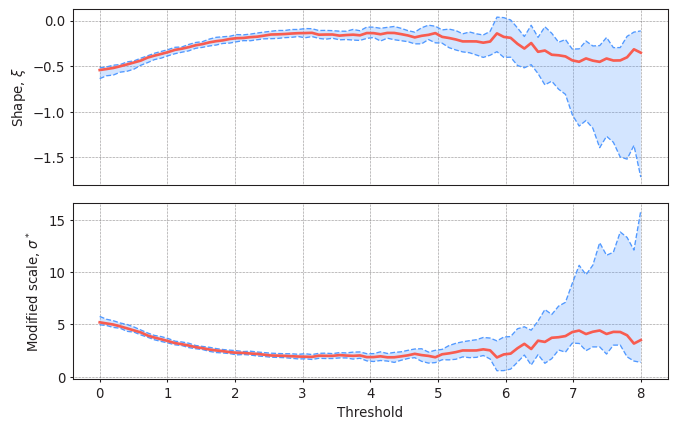

In [14]:
#Plotting the parameter stability plot for a declustering time of 72h
plot_parameter_stability(data, 
                         thresholds = np.linspace(0, 8, 80), 
                         r = "72H",
                         alpha = 0.95)

<div style="background-color:#ffffe0; vertical-align: middle; padding:3px 20px;">
<p>
Threshold should be selected so the parameters of the GPD remain stable. In this case, thresholds up to 5.5m seem reasonable.
You can perform this analysis with several values of the declustering time.</p>
</div>

<AxesSubplot:xlabel='Threshold', ylabel='Mean excess'>

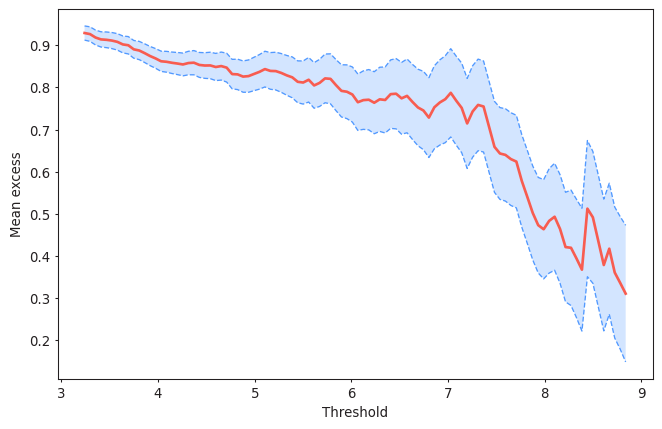

In [15]:
#Plotting the Mean Residual Life plot for a declustering time of 72h 
from pyextremes import plot_mean_residual_life
plot_mean_residual_life(data)

<div style="background-color:#ffffe0; vertical-align: middle; padding:3px 20px;">
<p>
Threshold should be selected so the mean excesses follow a linear trend. In this case, thresholds up to 6m seem reasonable.
You can perform this analysis with several values of the declustering time.</p>
</div>

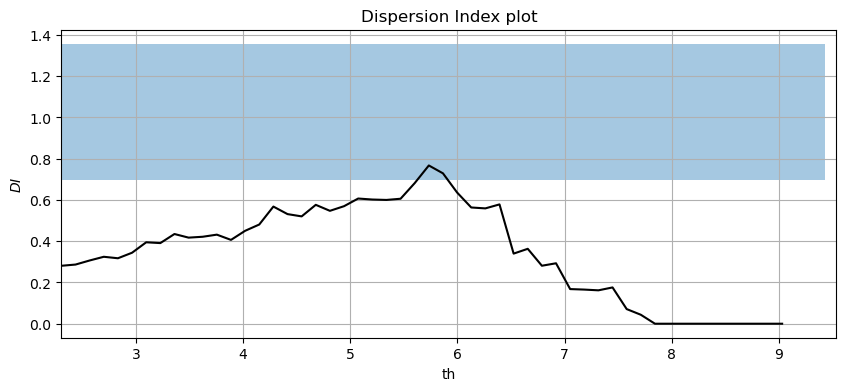

In [16]:
#Plotting the Dispersion Index plot for a declustering time of 72h
#In-house funciton: DI_plot(dates, data, dl, significance)
DI_plot(pandas_angle['significant_wave_height_(m)'], pandas_angle['date_&_time'], 72, 0.05)

<div style="background-color:#ffffe0; vertical-align: middle; padding:3px 20px;">
<p>
Threshold and declustering time should be selected so the Dispersion Index is approximately 1 (within the confidence band) to ensure that the number of excesses per year follows a Poisson distribution. Therefore, thresholds between 5.5 and 6m would be reasonable.</p>
</div>

<div style="background-color:#F9E076; vertical-align: middle; padding:3px 20px;">
<p>
Note that there will be some differences between your fitting and that provided by pyExtremes. You have probably defined the declustering time as the time between two extremes (two peaks). PyExtremes defines the declustering time as that between the crossing point over the threshold. The figure below illustrates the diffence.
</p>
</div>

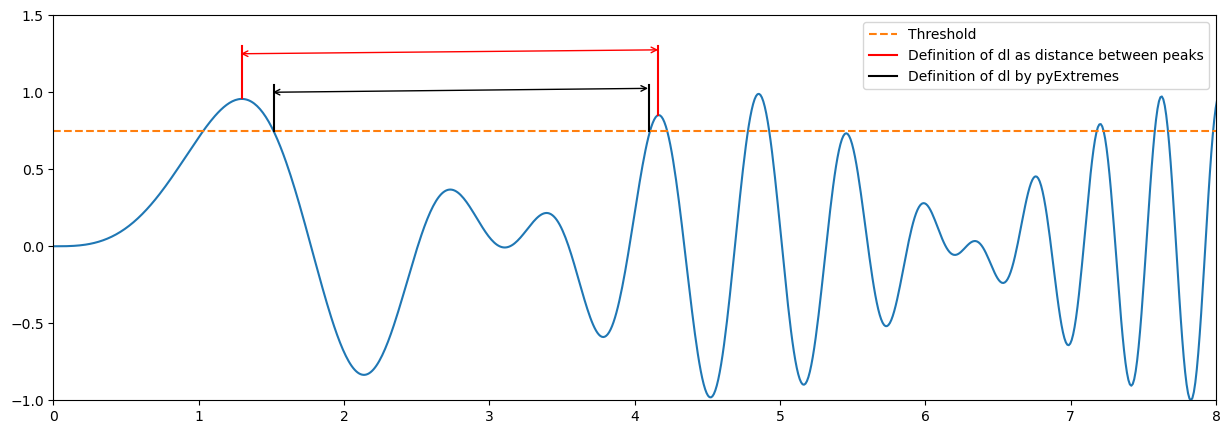

In [17]:
x = np.linspace(0, 10, 1000)
z = np.sin(x**2)
y = z*np.sin(x)

plt.figure(1, figsize = (15,5), facecolor='white')
plt.plot(x, y)
plt.plot([0, 10],[0.75, 0.75], '--', label = 'Threshold')

plt.annotate(' ', xy=(1.27, 1.25), xytext=(4.2, 1.25), arrowprops=dict(arrowstyle='<->', ec = 'r'))
plt.plot([1.3, 1.3],[0.96, 1.3], '-r', label = 'Definition of dl as distance between peaks')
plt.plot([4.16, 4.16],[0.85, 1.3], '-r')
plt.annotate(' ', xy=(1.49, 1), xytext=(4.13, 1), arrowprops=dict(arrowstyle='<->'))
plt.plot([1.52, 1.52],[0.75, 1.05], '-k', label = 'Definition of dl by pyExtremes')
plt.plot([4.1, 4.1],[0.75, 1.05], '-k')
plt.xlim([0, 8])
plt.ylim([-1, 1.5])
plt.legend()

<div style="background-color:#F9E076; vertical-align: middle; padding:3px 20px;">
<p>
Based on the above, would you expect more or less sampled extremes using pyExtremes? How would it affect to the calculated lambda?</p>
</div>

The definition of pyExtremes of dl is more restrictive. Thus, a lower number of extremes will be sampled and lambda will be lower.

<div style="background-color:#F9E076; vertical-align: middle; padding:3px 20px;">
<b>What next?</b>
<p>
We hope this workshop gave you a chance to practice EVA more so that you are able to easily use the code you have already created in your HOS assignments. In addition, we hope that you have more insight into the process of determining whether or not your chosen probability distribution is a good fit, and some tools to justify it quantitatively.</p>
    
For your HOS assignments and exams you are expected to be able to describe and explain the EVA process, including a justification for your chosen distribution. One thing that is not covered in this workshop is evaluating the effect of the distribution on your design: when working on a specific structure (e.g., your design exercises), it would be a good idea to consider the range of acceptable distributions. For POT, for example, this could mean choosing a few combinations of threshold and declustering time to see what the impact is on a specific design variable (e.g., rock size; dike height or slope; or size of a structural element in an offshore structure.
    
Keep in mind that depending on your application, the standard of practice can be different. For example, POT is widely used for offshore structures and breakwater design, whereas for the design of river dikes empirically derived EVA distributions based on river discharge simulations are used.
</div>